# Predicting Poverty
This notebook contains my analysis for the DrivenData.org 'Pover-T Tests: Predicting Poverty' competition.

# Problem Description
This is taken from the DrivenData competition webpage.

"Your models should predict whether or not a given household for a given country is poor or not. The training features are survey data from three countries. For each country, A, B, and C, survey data is provided at the household as well as individual level. Each household is identified by its id, and each individual is identified by both their household id and individual iid. Most households have multiple individuals that make up that household."

In [96]:
# Import modules

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model, decomposition, preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import RobustScaler
%matplotlib inline

# Load the training and test data into data frames
## Training
A_hhold_train_df = pd.read_csv("A_hhold_train.csv")
B_hhold_train_df = pd.read_csv("B_hhold_train.csv")
C_hhold_train_df = pd.read_csv("C_hhold_train.csv")
A_indiv_train_df = pd.read_csv("A_indiv_train.csv")
B_indiv_train_df = pd.read_csv("B_indiv_train.csv")
C_indiv_train_df = pd.read_csv("C_indiv_train.csv")
A_merge_train_df = pd.merge(A_hhold_train_df, A_indiv_train_df, on='id')
B_merge_train_df = pd.merge(B_hhold_train_df, B_indiv_train_df, on='id')
C_merge_train_df = pd.merge(C_hhold_train_df, C_indiv_train_df, on='id')

## Test
A_hhold_test_df = pd.read_csv("A_hhold_test.csv")
B_hhold_test_df = pd.read_csv("B_hhold_test.csv")
C_hhold_test_df = pd.read_csv("C_hhold_test.csv")
A_indiv_test_df = pd.read_csv("A_indiv_test.csv")
B_indiv_test_df = pd.read_csv("B_indiv_test.csv")
C_indiv_test_df = pd.read_csv("C_indiv_test.csv")
A_merge_test_df = pd.merge(A_hhold_test_df, A_indiv_test_df, on='id')
B_merge_test_df = pd.merge(B_hhold_test_df, B_indiv_test_df, on='id')
C_merge_test_df = pd.merge(C_hhold_test_df, C_indiv_test_df, on='id')

# Initial look at the data
The competition page provides a general explanation of the data but it would be useful to explore the data a bit first. Particularly, it would be good to see if there's any differences between the three countries A, B, and C, for both the household and individual data sets.

## Data format
Each column of data represents a survey question which is either multiple choice, where the response has been encoded as a random string, or it's a numeric value. Examples of questions are: "Does your household have items such as bar soap, cooking oil, matches, and salt?", "How many working cell phones in total does your household own?"

In [4]:
A_hhold_train_df.head()

,id,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
0,46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
1,82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
2,9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
3,10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
4,16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


In [5]:
A_hhold_train_df.describe()

,id,nEsgxvAq,OMtioXZZ,YFMZwKrU,TiwRslOh
count,8203.000000,8203.000000,8203.000000,8203.000000,8203.000000
mean,49672.317689,-7.590638,17.464464,-2.985615,-4.191028
std,28799.840963,5.810942,10.853654,0.896245,4.472567
min,14.000000,-70.000000,-127.000000,-4.000000,-31.000000
25%,24871.500000,-10.000000,12.000000,-4.000000,-7.000000
50%,49422.000000,-4.000000,12.000000,-3.000000,-3.000000
75%,74074.000000,-4.000000,21.000000,-2.000000,-1.000000
max,99965.000000,-4.000000,111.000000,1.000000,3.000000


In [6]:
A_hhold_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8203 entries, 0 to 8202
Columns: 346 entries, id to country
dtypes: bool(1), float64(2), int64(3), object(340)
memory usage: 21.6+ MB


In [7]:
A_hhold_train_df.describe(include=['O'])

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
count,8203,8203,8203,8203,8203,8203,8203,8203,8203,8203,...,8203,8203,8203,8203,8203,8203,8203,8203,8203,8203
unique,2,2,3,2,2,2,2,3,31,2,...,2,2,3,2,2,2,2,2,2,1
top,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
freq,8095,6015,5252,7728,7560,7797,6928,6860,398,8139,...,8196,7173,3640,7943,6199,8097,8141,7383,5433,8203


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1365acb90>]], dtype=object)

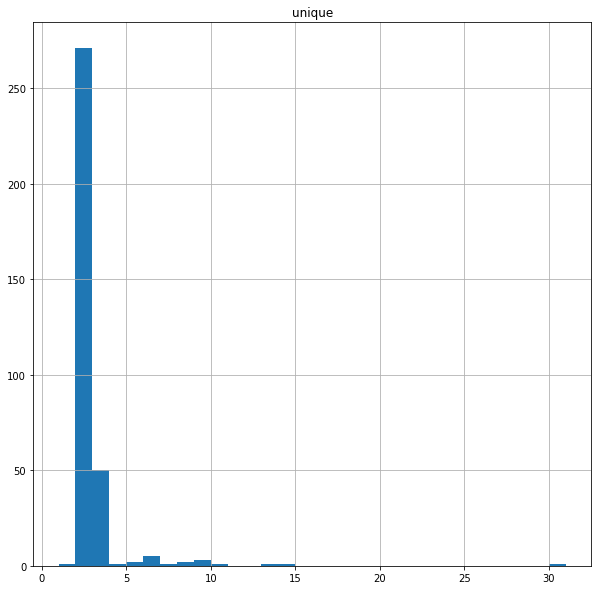

In [8]:
# Look at how many answers a typical multiple choice question has
A_hhold_unique = A_hhold_train_df.describe(include=['O']).iloc[[1]]
A_hhold_unique.transpose().astype(str).astype(int).hist(bins=30, figsize=(10,10))

## Initial insight
By looking at A_hhold_train_df, it can be seen that there are 4 columns excluding 'id' with numeric values (2 with floats, 2 with integers). There's the 'poor' column which is a bool and the rest are random strings from multiple choice questions.

Additionally, it can be seen that the multiple choice questions typically have 2 options which I would guess are "yes" and "no". It's interesting to see that there's at least one question with 30 answers.

## Things to do
* Convert multiple choice answers into dummy variables for logistic regression
* Examine individual dataset

In [9]:
A_hhold_train_df.select_dtypes(include=['object'])

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
0,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
1,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
2,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
3,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
4,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A
5,JhtDR,alLXR,BIZns,ZYabk,feupP,PHMVg,NDTCU,sehIp,bUhyU,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,aQeIm,A
6,JhtDR,GUusz,BIZns,ZYabk,feupP,PHMVg,PUBDZ,cLAGr,esAQH,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
7,JhtDR,GUusz,BIZns,ZYabk,feupP,PHMVg,NDTCU,sehIp,vVbnO,MwLvg,...,JqHnW,jkHEU,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
8,JhtDR,GUusz,BIZns,ZYabk,feupP,PHMVg,NDTCU,sehIp,yKWYC,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,LPtkN,vkbkA,qQxrL,AITFl,cecIq,A
9,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,RpXJc,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,AITFl,aQeIm,A


In [10]:
A_hhold_train_dum = pd.get_dummies(A_hhold_train_df)
A_hhold_test_dum = pd.get_dummies(A_hhold_test_df)

In [11]:
A_hhold_train_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8203 entries, 0 to 8202
Columns: 861 entries, id to country_A
dtypes: bool(1), float64(2), int64(3), uint8(855)
memory usage: 7.0 MB


# Attempt Logistic Regression
The data for the A househould training set has been made into a usable data frame. This now needs to be split into the X and y components and given to a logistic regression.

In [12]:
X_A_hhold_train, X_A_hhold_val, y_A_hhold_train, y_A_hhold_val = train_test_split(A_hhold_train_dum.drop(['poor'], axis=1), 
                                                                                  A_hhold_train_dum['poor'], test_size=0.4,
                                                                                  random_state=0)

In [13]:
X_A_hhold_train.shape, y_A_hhold_train.shape, X_A_hhold_val.shape, y_A_hhold_val.shape

((4921, 860), (4921,), (3282, 860), (3282,))

In [14]:
logit = linear_model.LogisticRegression()
logit_model = logit.fit(X_A_hhold_train, y_A_hhold_train)

In [15]:
logit_model.score(X_A_hhold_val, y_A_hhold_val)

0.84582571602681289

I broke the training set data into 2 pieces: a training set of 60% and a validation set of 40%. This allows me to train on a portion of the data and then check my performance on untrained data that I know the answer to. Using just the A_hhold I managed to predict with an accuracy of 84.6% whether an entry was poor in the validation set.

The next step is to expand this to a larger training set containing all of the household data. I'd like to submit once using just household information to see how well I perform. I would then like to merge the household and individual data together and create a new model with this information.

In [16]:
B_hhold_train_dum = pd.get_dummies(B_hhold_train_df)
B_hhold_test_dum = pd.get_dummies(B_hhold_test_df)
C_hhold_train_dum = pd.get_dummies(C_hhold_train_df)
C_hhold_test_dum = pd.get_dummies(C_hhold_test_df)

In [17]:
hhold_train_dum = pd.concat([A_hhold_train_dum, B_hhold_train_dum, C_hhold_train_dum])
X_hhold_train, X_hhold_val, y_hhold_train, y_hhold_val = train_test_split(hhold_train_dum.drop(['poor'], axis=1),
                                                                         hhold_train_dum['poor'], test_size=0.4,
                                                                         random_state=0)

In [18]:
logit_hhold = logit.fit(X_hhold_train, y_hhold_train)
logit_hhold.score(X_hhold_val, y_hhold_val)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Finding a problem in the setup
I attempted to repeat for B and C countries what I did for A, however, I discovered that I had a NaN, infinity, or too large of a value which caused my fit to fail.

In [103]:
# Quick check to see if there are any NaN
B_hhold_train_dum.isnull().values.any()

True

In [104]:
# More detail for NaN
B_hhold_train_dum.isnull().sum().sum()

16784

## How to handle NaNs
It seems the B household data contains 9 columns with a large percentage of NaNs in each column. Typical ways of treating NaNs is to fill them with the average value or to drop them. I don't know what these are so I don't know if it's a good idea to fill with the most common answer so instead I'll drop these columns.

In [102]:
# Check which columns have NaNs
#B_hhold_train_df.select_dtypes(include=['float64'])
B_NaN_list = B_hhold_train_df.columns[B_hhold_train_df.isnull().any()].tolist()
B_hhold_train_df[B_NaN_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 9 columns):
FGWqGkmD    602 non-null float64
BXOWgPgL    2504 non-null float64
umkFMfvA    890 non-null float64
McFBIGsm    2504 non-null float64
IrxBnWxE    272 non-null float64
BRzuVmyf    1794 non-null float64
dnlnKrAg    532 non-null float64
aAufyreG    909 non-null float64
OSmfjCbE    2504 non-null float64
dtypes: float64(9)
memory usage: 228.9 KB


In [105]:
# Check if C household has any Nan
C_hhold_train_df.isnull().values.any()

False

In [106]:
# Check if the individual data sets have any NaNs
A_indiv_train_df.isnull().values.any()

True

In [107]:

B_indiv_train_df.isnull().values.any()

True

In [108]:

C_indiv_train_df.isnull().values.any()

False

In [109]:
# Check test set for NaNs as well
isNaN_A_hhold = A_hhold_test_df.isnull().values.any()
isNaN_A_indiv = A_indiv_test_df.isnull().values.any()
isNaN_B_hhold = B_hhold_test_df.isnull().values.any()
isNaN_B_indiv = B_indiv_test_df.isnull().values.any()
isNaN_C_hhold = C_hhold_test_df.isnull().values.any()
isNaN_C_indiv = C_indiv_test_df.isnull().values.any()

print('isNaN_A_hhold: ' + str(isNaN_A_hhold))
print('isNaN_A_indiv: ' + str(isNaN_A_indiv))
print('isNaN_B_hhold: ' + str(isNaN_B_hhold))
print('isNaN_B_indiv: ' + str(isNaN_B_indiv))
print('isNaN_C_hhold: ' + str(isNaN_C_hhold))
print('isNaN_C_indiv: ' + str(isNaN_C_indiv))

isNaN_A_hhold: False
isNaN_A_indiv: True
isNaN_B_hhold: True
isNaN_B_indiv: True
isNaN_C_hhold: False
isNaN_C_indiv: False


In [110]:
# Handle training NaNs: A_indiv, B_hhold, B_indiv
A_indiv_NaN_list = A_indiv_train_df.columns[A_indiv_train_df.isnull().any()].tolist()
B_indiv_NaN_list = B_indiv_train_df.columns[B_indiv_train_df.isnull().any()].tolist()

# Handle test NaNs: A_indiv, B_hhold, B_indiv
A_indiv_test_NaN_list = A_indiv_test_df.columns[A_indiv_test_df.isnull().any()].tolist()
B_hhold_test_NaN_list = B_hhold_test_df.columns[B_hhold_test_df.isnull().any()].tolist()
B_indiv_test_NaN_list = B_indiv_test_df.columns[B_indiv_test_df.isnull().any()].tolist()

In [111]:
A_indiv_train_df[A_indiv_NaN_list].shape

(37560, 1)

In [112]:
B_indiv_train_df[B_indiv_NaN_list].shape

(20252, 28)

In [113]:
# Drop NaN columns for test and training data
A_indiv_train_df = A_indiv_train_df.drop(A_indiv_NaN_list, axis=1)
B_indiv_train_df = B_indiv_train_df.drop(B_indiv_NaN_list, axis=1)
B_hhold_train_df = B_hhold_train_df.drop(B_NaN_list, axis=1)

A_indiv_test_df = A_indiv_test_df.drop(A_indiv_test_NaN_list, axis=1)
B_hhold_test_df = B_hhold_test_df.drop(B_hhold_test_NaN_list, axis=1)
B_indiv_test_df = B_indiv_test_df.drop(B_indiv_test_NaN_list, axis=1)

In [114]:
# Double check that all NaNs are removed
print('Training')
isNaN_A_hhold = A_hhold_train_df.isnull().values.any()
isNaN_A_indiv = A_indiv_train_df.isnull().values.any()
isNaN_B_hhold = B_hhold_train_df.isnull().values.any()
isNaN_B_indiv = B_indiv_train_df.isnull().values.any()
isNaN_C_hhold = C_hhold_train_df.isnull().values.any()
isNaN_C_indiv = C_indiv_train_df.isnull().values.any()

print('isNaN_A_hhold: ' + str(isNaN_A_hhold))
print('isNaN_A_indiv: ' + str(isNaN_A_indiv))
print('isNaN_B_hhold: ' + str(isNaN_B_hhold))
print('isNaN_B_indiv: ' + str(isNaN_B_indiv))
print('isNaN_C_hhold: ' + str(isNaN_C_hhold))
print('isNaN_C_indiv: ' + str(isNaN_C_indiv))

print('_'*40)

print('Test')
isNaN_A_hhold = A_hhold_test_df.isnull().values.any()
isNaN_A_indiv = A_indiv_test_df.isnull().values.any()
isNaN_B_hhold = B_hhold_test_df.isnull().values.any()
isNaN_B_indiv = B_indiv_test_df.isnull().values.any()
isNaN_C_hhold = C_hhold_test_df.isnull().values.any()
isNaN_C_indiv = C_indiv_test_df.isnull().values.any()

print('isNaN_A_hhold: ' + str(isNaN_A_hhold))
print('isNaN_A_indiv: ' + str(isNaN_A_indiv))
print('isNaN_B_hhold: ' + str(isNaN_B_hhold))
print('isNaN_B_indiv: ' + str(isNaN_B_indiv))
print('isNaN_C_hhold: ' + str(isNaN_C_hhold))
print('isNaN_C_indiv: ' + str(isNaN_C_indiv))

Training
isNaN_A_hhold: False
isNaN_A_indiv: False
isNaN_B_hhold: False
isNaN_B_indiv: False
isNaN_C_hhold: False
isNaN_C_indiv: False
________________________________________
Test
isNaN_A_hhold: False
isNaN_A_indiv: False
isNaN_B_hhold: False
isNaN_B_indiv: False
isNaN_C_hhold: False
isNaN_C_indiv: False


In [115]:
# No more NaNs, check for infinities or large floats
A_hhold_train_df.select_dtypes(include=['float64','int64']).describe()

,id,nEsgxvAq,OMtioXZZ,YFMZwKrU,TiwRslOh
count,8203.000000,8203.000000,8203.000000,8203.000000,8203.000000
mean,49672.317689,-7.590638,17.464464,-2.985615,-4.191028
std,28799.840963,5.810942,10.853654,0.896245,4.472567
min,14.000000,-70.000000,-127.000000,-4.000000,-31.000000
25%,24871.500000,-10.000000,12.000000,-4.000000,-7.000000
50%,49422.000000,-4.000000,12.000000,-3.000000,-3.000000
75%,74074.000000,-4.000000,21.000000,-2.000000,-1.000000
max,99965.000000,-4.000000,111.000000,1.000000,3.000000


In [116]:
B_hhold_train_df.select_dtypes(include=['float64','int64']).describe()

,id,wJthinfa,ZvEApWrk,vuQrLzvK,qrOrXLPM,NjDdhqIe,rCVqiShm,ldnyeZwD,BEyCyEUG,NBWkerdL,VyHofjLM,GrLBZowF,oszSdLhD,cDhZjxaW,IOMvIGQS
count,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000
mean,50057.635023,43.381260,96.040860,17.427343,22.203379,88.597849,-48.195392,36.681720,-20.377880,-158.619355,1.974808,-249.528111,0.670661,-85.937020,78.568356
std,28615.901302,22.728441,105.556895,72.057949,6.962658,107.268927,52.981575,14.338179,6.092788,148.419433,1.565015,322.468103,1.833827,114.537914,63.123421
min,17.000000,-126.000000,-2.000000,-125.000000,8.000000,-7.000000,-968.000000,-126.000000,-34.000000,-1681.000000,-2.000000,-5044.000000,-23.000000,-3639.000000,0.000000
25%,25938.000000,26.000000,33.000000,-39.000000,16.000000,28.000000,-48.000000,25.000000,-24.000000,-211.000000,2.000000,-364.000000,1.000000,-119.000000,50.000000
50%,50299.000000,42.000000,68.000000,27.000000,24.000000,63.000000,-28.000000,34.000000,-24.000000,-106.000000,2.000000,-184.000000,1.000000,-59.000000,50.000000
75%,74848.000000,58.000000,138.000000,77.000000,24.000000,98.000000,-28.000000,43.000000,-14.000000,-71.000000,2.000000,-64.000000,1.000000,-39.000000,100.000000
max,99979.000000,122.000000,1069.000000,127.000000,48.000000,1253.000000,-8.000000,124.000000,-4.000000,-1.000000,8.000000,-4.000000,1.000000,1.000000,900.000000


In [117]:
C_hhold_train_df.drop(['id'], axis=1).select_dtypes(include=['float64', 'int64']).max()

LhUIIEHQ          35.00
PNAiwXUz         711.00
jmsRIiqp          85.00
NONtAKOM           8.00
kLAQgdly         -10.00
WWuPOkor           5.00
CtFxPQPT          -1.00
GIwNbAsH           3.00
qLDzvjiU          11.00
detlNNFh        1394.00
izNLFWMH         356.00
tXjyOtiS           8.00
EQtGHLFz          -6.00
xFKmUXhu    13105415.56
cmjTMVrd           4.00
hJrMTBVd          52.00
BBPluVrb           7.00
IRMacrkM          -3.00
EQSmcscG           0.00
DBjxSUvf     1675854.00
kiAJBGqv          30.00
aFKPYcDt          39.00
gAZloxqF           1.00
phbxKGlB          -2.00
nTaJkLaJ        1748.00
ZZGQNLOX         -13.00
snkiwkvf         -10.00
POJXrpmn           2.00
vSqQCatY        1495.00
mmoCpqWS         127.00
dtype: float64

## Try Logistic Regression again

In [156]:
# Overwrite previous version of X_hhold_Y_dum variables
## DON'T MAKE DUMMIES UNTIL AFTER NaNs ARE REMOVED
#A_hhold_train_dum = pd.get_dummies(A_hhold_train_df)
#A_hhold_test_dum = pd.get_dummies(A_hhold_test_df)
#B_hhold_train_dum = pd.get_dummies(B_hhold_train_df)
#B_hhold_test_dum = pd.get_dummies(B_hhold_test_df)
#C_hhold_train_dum = pd.get_dummies(C_hhold_train_df)
#C_hhold_test_dum = pd.get_dummies(C_hhold_test_df)

#hhold_train_dum = pd.concat([A_hhold_train_dum, B_hhold_train_dum, C_hhold_train_dum], axis=1)
hhold_train_df = pd.concat([A_hhold_train_df, B_hhold_train_df, C_hhold_train_df], axis=1)

X_hhold_train, X_hhold_val, y_hhold_train, y_hhold_val = train_test_split(hhold_train_df.drop(['poor','id'], axis=1),
                                                                         hhold_train_df['poor'], test_size=0.4,
                                                                         random_state=0)


#C_hhold_train_df.isnull().values.any()
#C_hhold_train_dum.isnull().values.any()
hhold_train_dum.isnull().values.any()
#X_hhold_train.isnull().values.any()

# pd.concat introduces NaNs

# scale the data before analyzing
#scaler = preprocessing.StandardScaler().fit(X_hhold_train)
#X_hhold_train_scsaled = scaler.transform(X_hhold_train)

#logit_hhold = logit.fit(X_hhold_train, y_hhold_train)
#logit_hhold.score(X_hhold_val, y_hhold_val)

True

## Concat introduces NaNs
I discovered that after removing NaNs I was still getting error messages about NaNs when trying to run logit. It seems that my initial attempt at concatenating my dataframes caused NaNs to be introduced. I believe the way to get around this is to re-index my dataframes.

It looks like it will re-introduce NaNs I have previously removed because I'm combining dataframes where it adds columns that the other datasets don't necessarily have and therefore puts NaNs in those entries.

In [168]:
A_hhold_train_dum = A_hhold_train_df.set_index('id')
A_hhold_test_dum = A_hhold_test_df.set_index('id')
B_hhold_train_dum = B_hhold_train_df.set_index('id')
B_hhold_test_dum = B_hhold_test_df.set_index('id')
C_hhold_train_dum = C_hhold_train_df.set_index('id')
C_hhold_test_dum = C_hhold_test_df.set_index('id')

hhold_train_dum = pd.concat([A_hhold_train_dum, B_hhold_train_dum, C_hhold_train_dum])
hhold_test_dum = pd.concat([A_hhold_test_dum, B_hhold_test_dum, C_hhold_test_dum])

# Remove any column with NaNs
hhold_train_dum_NaN_list = hhold_train_dum.columns[hhold_train_dum.isnull().any()].tolist()
hhold_train_dum = hhold_train_dum.drop(hhold_train_dum_NaN_list, axis=1)
hhold_train_dum.isnull().values.any()

hhold_test_dum_NaN_list = hhold_test_dum.columns[hhold_test_dum.isnull().any()].tolist()
hhold_test_dum = hhold_test_dum.drop(hhold_test_dum_NaN_list, axis=1)
hhold_test_dum.isnull().values.any()

False

In [169]:
# Create sklearn train_test_split and make dummy variables
X_hhold_train, X_hhold_val, y_hhold_train, y_hhold_val = train_test_split(hhold_train_dum.drop(['poor'], axis=1),
                                                                         hhold_train_dum['poor'], test_size=0.4,
                                                                         random_state=0)
#C_hhold_test_dum = pd.get_dummies(C_hhold_test_df)
X_hhold_train_dum = pd.get_dummies(X_hhold_train)
X_hhold_val_dum = pd.get_dummies(X_hhold_val)
X_hhold_test_dum = pd.get_dummies(hhold_test_dum)


In [166]:
# Run logit again
logit_hhold = logit.fit(X_hhold_train_dum, y_hhold_train)
logit_hhold.score(X_hhold_val_dum, y_hhold_val)

0.7287686515130386

In [174]:
# predict on test set
logit_hhold.predict(X_hhold_test_dum)
X_hhold_test_dum.index.values

array([  418, 41249, 16205, ..., 35424, 81668, 98377])

## Combined Logit summary
When I made a model for country A alone, I achieved an 84% accuracy for the validation set. When combining everything, I achieved a 73% accuracy. I'm curious if the problem is training on all 3 at once, or if there's something else happening.

It might be easier to do each country separately since I'll have a 'country' column for each with the respective place. Othewrise I need to reverse my get_dummies command and extract which are A, B, and C in order to create the submission csv.

In [180]:
# A_hhold
y_A_hhold = A_hhold_train_dum['poor']

# Get dummies
A_hhold_train_dum = pd.get_dummies(A_hhold_train_dum.drop(['poor']), axis=1)

### Need to make sure training and test sets have same shape!

X_A_hhold_train, X_A_hhold_val, y_A_hhold_train, y_A_hhold_val = train_test_split(A_hhold_train_dum.drop(['poor'], axis=1),
                                                                                  A_hhold_train_dum['poor'], test_size=0.4,
                                                                                  random_state=0)
X_A_hhold_train_dum = pd.get_dummies(X_A_hhold_train)
X_A_hhold_val_dum = pd.get_dummies(X_A_hhold_val)
X_A_hhold_test_dum = pd.get_dummies(A_hhold_test_dum)

print(X_A_hhold_train.shape)
print(X_A_hhold_val.shape)
print(X_A_hhold_test_dum.shape)

# Run logit for A_hhold
#logit_A_hhold = logit.fit(X_A_hhold_train_dum, y_A_hhold_train)
#logit_A_hhold.score(X_A_hhold_val_dum, y_A_hhold_val)


(4921, 344)
(3282, 344)
(4041, 851)


# Update on tasks
- How does logit handle continuous and categorical data at the same time?
- I should normalize features if possible

In [ ]:
#X_train, X_val, y_train, y_val = train_test_split(A_hhold_train_df.drop(['poor'], axis=1), 
#                                                  A_hhold_train_df['poor'], test_size=0.4,
#                                                  random_state=0)
#logit_model = logit.fit(X_train, y_train)
#logit_model.score(X_val, y_val)

#A_hhold_train_df.select_dtypes(include=['float64']).head()
df_check = A_hhold_train_df
rs = RobustScaler().fit_transform(A_hhold_train_df.select_dtypes(include=['float64']))
rs_df = pd.DataFrame(rs, index=df_check.index.values)
to_drop = df_check.select_dtypes(include=['float64']).columns.values
df_check.drop(to_drop, axis=1)
df_check = pd.merge(df_check, rs_df, on='id')
df_check.select_dtypes(include=['float64']).head()